In [ ]:
import torch
from PIL import Image
import torchvision
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_data = torch.utils.data.Dataset.FashionMNIST()

AttributeError: ignored

In [ ]:
training_data = torchvision.datasets.FashionMNIST(root = '/content/MNIST',
                                                  download = True,
                                                  train = True)
test_data = torchvision.datasets.FashionMNIST(root = '/content/MNIST',
                                                  download = True,
                                                  train = False)

In [ ]:
# ! rm -r /content/MNIST

In [ ]:
xt = torch.tensor(3.).requires_grad_()
print(xt)

tensor(3., requires_grad=True)


In [ ]:
yt = 2*(xt)
yt.backward()

In [ ]:
print(xt.grad, xt)

tensor(2.) tensor(3., requires_grad=True)


In [ ]:
x = [[i *j for i in range(1,4)] for j in range(3,30,4)]
x = np.array(x)
x[0][0].item()

3

In [ ]:
from fastai.vision.all import*
path = untar_data(URLs.PETS)

In [ ]:
(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Egyptian_Mau_219.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Maine_Coon_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_72.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_192.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_28.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_136.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_71.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Sphynx_110.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/great_pyrenees_177.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/chihuahua_175.jpg')...]

In [ ]:
fname = (path/'images').ls()[0]
fname.name

'Egyptian_Mau_219.jpg'

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Egyptian_Mau']

In [ ]:
pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed = 42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460),
                 batch_tfms = aug_transforms(size = 224, min_scale = 0.75))
dls = pets.dataloaders(path/'images')

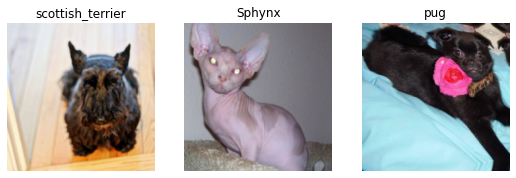

In [ ]:
# pets.summary(path/'images')
dls.show_batch(nrows = 1,ncols=3)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics = error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:284: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:209: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and will be removed in 0.15, please use 'weights' instead.
  f"The parameter '{pretrained_param}' is deprecated since 0.13 and will be removed in 0.15, "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f370

  0%|          | 0.00/44.7M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.641453,0.377973,0.110284,20:48


epoch,train_loss,valid_loss,error_rate,time
0,0.538299,0.292906,0.085250,27:59
